# Henon Map

In [4]:
using Plots, LaTeXStrings
pyplot(markerstrokecolor=false)

Plots.PyPlotBackend()

Se define el mapeo de Hénon de la siguiente forma:

$$ x_{i+1} = y_i - ax_{i}^2 +1$$
$$ y_{i+1} = bx_i$$

In [5]:
x_n(x, y, a) = y - a*x^2 +1
y_n(x,y, b) = b*x

y_n (generic function with 1 method)

Quiero formar un cuadrado y empezar a "deformarlo" usando el mapeo para ver cómo actúa para un conjunto de condiciones iniciales.

In [6]:
function condiones_iniciales_2D(f::Function, t_range)
    CI = zeros(2, length(t_range))
    
    for i in 1:length(t_range)
        
        CI[:, i] = f(t_range[i])
        
    end
    
    CI
    
end

condiones_iniciales_2D (generic function with 1 method)

In [7]:
σ(t) = [cos(t), sin(t)]

σ (generic function with 1 method)

In [8]:
t_rango = 0:0.01:2π
CI1 = condiones_iniciales_2D(σ, t_rango)

2×629 Array{Float64,2}:
 1.0  0.99995     0.9998     0.99955    …   0.999731    0.999913    0.999995 
 0.0  0.00999983  0.0199987  0.0299955     -0.0231832  -0.0131849  -0.0031853


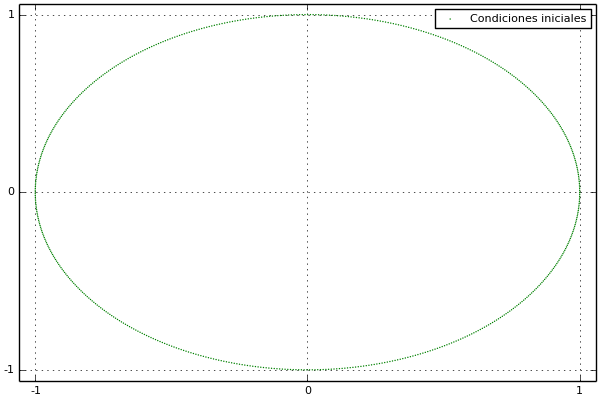

In [9]:
scatter(CI1[1,:], CI1[2,:], markersize=(1), markercolor=:green, label=("Condiciones iniciales"))

In [10]:
function iterator_paso(f::Function, g::Function, X0, a, b)
    
    orbit = similar(X0)
    
    for i in 1:length(X0[1, :])
        
        orbit[1, i] = f(X0[1, i], X0[2, i], a)
        orbit[2, i] = g(X0[1, i], X0[2, i], b)
    
    end
    
    orbit
    
end 

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/font_manager.py:1236: UserWarning: findfont: Font family ['Helvetica'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


iterator_paso (generic function with 1 method)

In [20]:
CI2 = iterator_paso(x_n, y_n, CI1)
CI3 = iterator_paso(x_n, y_n, CI2)
CI4 = iterator_paso(x_n, y_n, CI3)
scatter(CI1[1,:], CI1[2,:], markersize=(1), markercolor=:green, label=("Condiciones iniciales"))
scatter!(CI2[1,:], CI2[2,:], markersize=(1), legend = false, markercolor=:blue)
scatter!(CI3[1,:], CI3[2,:], markersize=(1), legend = false, markercolor=:red)
scatter!(CI4[1,:], CI4[2,:], markersize=(1), legend = false, markercolor=:black)

LoadError: LoadError: MethodError: no method matching iterator_paso(::#x_n, ::#y_n, ::Array{Float64,2})
Closest candidates are:
  iterator_paso(::Function, ::Function, ::Any, !Matched::Any, !Matched::Any) at In[10]:3
while loading In[20], in expression starting on line 1

In [21]:
function iterator(f::Function, g::Function, n, x0, y0)
    
    orbit = zeros(2, n+1)
    orbit[1,1] = x0 ; orbit[2,1] = y0
    
    for i in 1:n
        
        orbit[1, i+1] = f(orbit[1,i], orbit[2, i])
        orbit[2, i+1] = g(orbit[1,i], orbit[2, i])
        
    end
    
    orbit
    
end 

iterator (generic function with 1 method)

In [13]:
b = 0.3

0.3

In [14]:
b

0.3

In [23]:
orbita_b_03 = iterator(x_n, y_n, 10000, 0, 0)
scatter(orbita_b_03[1,:], orbita_b_03[2,:], markersize=1)

LoadError: LoadError: MethodError: no method matching x_n(::Float64, ::Float64)
Closest candidates are:
  x_n(::Any, ::Any, !Matched::Any) at In[5]:1
while loading In[23], in expression starting on line 1

#### b = -1

In [16]:
b = 0.3

0.3

In [17]:
b

0.3

In [18]:
orbita_b_1 = iterator(x_n, y_n, 10000, 0, 0)
scatter(orbita_b_1[1,:], orbita_b_1[2,:], markersize=1)

LoadError: LoadError: MethodError: no method matching x_n(::Float64, ::Float64)
Closest candidates are:
  x_n(::Any, ::Any, !Matched::Any) at In[5]:1
while loading In[18], in expression starting on line 1

😎

#### Referencias

M. Hénon (1976). "A two-dimensional mapping with a strange attractor". Communications in Mathematical Physics. 50 (1): 69–77. 